<a href="https://colab.research.google.com/github/Puneetgupta2301/Customer_churn_prediction/blob/main/Customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('customer-churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.shape

(7043, 21)

In [6]:
data.drop('customerID' , axis='columns', inplace=True)
data.shape


(7043, 20)

In [54]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
data.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [56]:
pd.to_numeric(data.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [8]:
pd.to_numeric(data.TotalCharges, errors='coerce').isnull()


0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [9]:
data[pd.to_numeric(data.TotalCharges, errors='coerce').isnull()].shape

(11, 20)

In [10]:
df=data[data.TotalCharges!= ' ']
df.shape

(7032, 20)

In [11]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)


<ipython-input-11-e4980e5e83ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.TotalCharges = pd.to_numeric(df.TotalCharges)


In [12]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
df.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

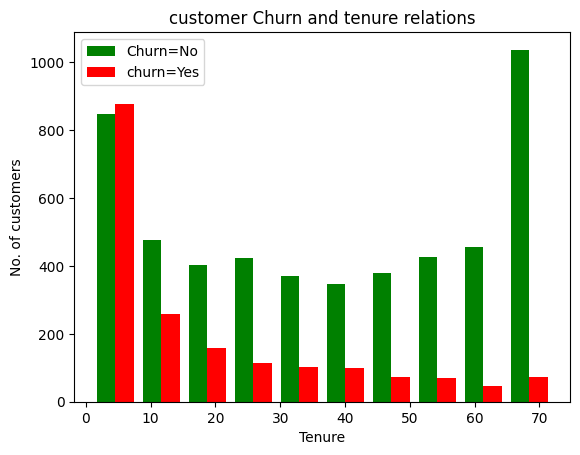

In [14]:
df_tenure_no=df[df.Churn=='No'].tenure
df_tenure_yes=df[df.Churn=='Yes'].tenure
plt.hist([df_tenure_no,df_tenure_yes], color=['green', 'red'],label=['Churn=No', 'churn=Yes'])
plt.ylabel('No. of customers')
plt.xlabel('Tenure')
plt.title("customer Churn and tenure relations")
plt.legend()

In [15]:
for column in df:
  print(f'{column} : {df[column].unique()} ')

gender : ['Female' 'Male'] 
SeniorCitizen : [0 1] 
Partner : ['Yes' 'No'] 
Dependents : ['No' 'Yes'] 
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 
PhoneService : ['No' 'Yes'] 
MultipleLines : ['No phone service' 'No' 'Yes'] 
InternetService : ['DSL' 'Fiber optic' 'No'] 
OnlineSecurity : ['No' 'Yes' 'No internet service'] 
OnlineBackup : ['Yes' 'No' 'No internet service'] 
DeviceProtection : ['No' 'Yes' 'No internet service'] 
TechSupport : ['No' 'Yes' 'No internet service'] 
StreamingTV : ['No' 'Yes' 'No internet service'] 
StreamingMovies : ['No' 'Yes' 'No internet service'] 
Contract : ['Month-to-month' 'One year' 'Two year'] 
PaperlessBilling : ['Yes' 'No'] 
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 
MonthlyCharges : [29.85 56.95 53.85 .

In [16]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

<ipython-input-16-a3b38cb57363>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('No internet service', 'No', inplace=True)
<ipython-input-16-a3b38cb57363>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('No phone service', 'No', inplace=True)


In [17]:
for col in df:
  print(df[col].unique())

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
['No' 'Yes']
['No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
['No' 'Yes']


In [18]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
for col in df:
  print(df[col].unique())

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
['No' 'Yes']
['No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
['No' 'Yes']


In [20]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)


<ipython-input-20-479965e89572>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].replace({'Yes': 1,'No': 0},inplace=True)


In [21]:
for col in df:
  print(df[col].unique())

['Female' 'Male']
[0 1]
[1 0]
[0 1]
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
[0 1]
[0 1]
['DSL' 'Fiber optic' 'No']
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
['Month-to-month' 'One year' 'Two year']
[1 0]
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
[0 1]


In [22]:
df2 = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])
df2.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [23]:
df2.sample(5)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1849,Male,0,0,0,10,1,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
6275,Male,0,0,0,62,1,1,1,1,1,...,True,False,False,False,False,True,True,False,False,False
3896,Female,0,1,1,38,1,0,0,0,0,...,False,False,True,False,True,False,False,False,False,True
5106,Female,0,0,0,52,1,0,0,0,1,...,True,False,False,True,False,False,False,False,True,False
2119,Male,0,1,1,46,1,0,0,0,0,...,False,False,True,False,True,False,True,False,False,False


In [24]:
col = ['InternetService_No', 'InternetService_DSL', 'InternetService_Fiber optic',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

for i in col:
    df2[i].replace({False: 0, True: 1}, inplace=True)


In [25]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
133,Male,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
864,Male,0,0,0,22,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3307,Female,0,1,1,48,1,1,0,1,0,...,1,0,0,0,0,1,0,0,1,0
6700,Male,0,1,0,72,1,1,0,1,1,...,0,1,0,0,0,1,1,0,0,0
1573,Male,0,1,1,47,1,0,1,1,1,...,0,1,0,0,1,0,0,0,1,0


In [26]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
me=MinMaxScaler()
df2[cols_to_scale]=me.fit_transform(df[cols_to_scale])

In [76]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6598,Female,0,0,0,0.788732,1,0,1,1,1,...,1,0,0,0,0,1,0,1,0,0
6733,Male,0,0,0,0.366197,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
1316,Male,0,0,0,0.084507,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
578,Male,1,1,0,0.478873,1,1,1,1,0,...,0,1,0,1,0,0,0,0,1,0
1018,Male,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [27]:
df2['gender'].replace({'Male':1,'Female':0}, inplace=True)

In [28]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2515,0,0,0,0,0.887324,1,1,1,1,1,...,0,1,0,0,0,1,1,0,0,0
5388,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
132,1,0,0,0,0.929577,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
4884,0,0,1,1,0.563380,1,0,0,0,1,...,0,1,0,1,0,0,1,0,0,0
3540,0,0,1,1,1.000000,1,0,1,1,1,...,0,1,0,0,0,1,1,0,0,0


Train Test Split

In [29]:
from sklearn.model_selection import train_test_split
X=df2.iloc[: , :-1].values
y=df2.iloc[:,-1].values

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=100)

In [31]:
X_train.shape


(5625, 26)

Training ANN model

In [32]:
import tensorflow as tf
from tensorflow import keras

In [37]:
model=keras.Sequential([
  keras.layers.Dense(20,input_shape=(26, ), activation='relu'),
  #keras.layers.Dense(15,activation='relu'),
  keras.layers.Dense(1,activation='sigmoid')
])
model.compile (
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train, epochs=6)

Epoch 1/6
176/176 [==============================] - 2s 5ms/step - loss: 0.4623 - accuracy: 0.7845
Epoch 2/6
176/176 [==============================] - 1s 6ms/step - loss: 0.2839 - accuracy: 0.9148
Epoch 3/6
176/176 [==============================] - 0s 2ms/step - loss: 0.1235 - accuracy: 0.9860
Epoch 4/6
176/176 [==============================] - 0s 2ms/step - loss: 0.0542 - accuracy: 0.9998
Epoch 5/6
176/176 [==============================] - 0s 2ms/step - loss: 0.0284 - accuracy: 1.0000
Epoch 6/6
176/176 [==============================] - 0s 2ms/step - loss: 0.0170 - accuracy: 1.0000


In [38]:
y_pred=model.predict(X_test)

44/44 [==============================] - 0s 1ms/step


In [39]:
y_pred[:5]


array([[0.00382817],
       [0.00118801],
       [0.00780577],
       [0.9590676 ],
       [0.0171498 ]], dtype=float32)

In [40]:
y_test[:5]

array([0, 0, 0, 1, 0])

In [43]:
yp=[ ]
for i in y_pred:
  if i>0.5:
    yp.append(1)
  else:
    yp.append(0)


In [44]:
yp[:5]

[0, 0, 0, 1, 0]

In [46]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1098
           1       1.00      1.00      1.00       309

    accuracy                           1.00      1407
   macro avg       1.00      1.00      1.00      1407
weighted avg       1.00      1.00      1.00      1407



Text(50.722222222222214, 0.5, 'Truth')

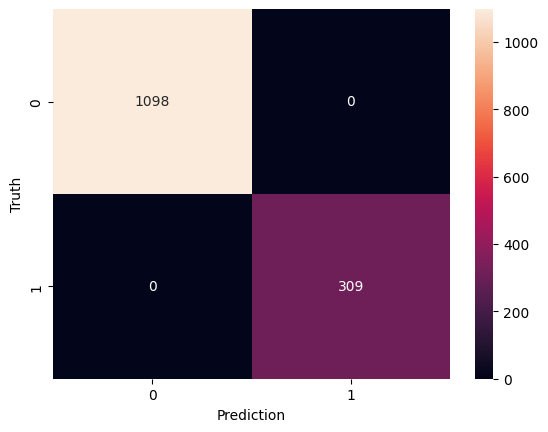

In [54]:
import seaborn as sb
cm=tf.math.confusion_matrix(labels=y_test, predictions=yp)
sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')